In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## Deep Learning with Python Second Edititon (2021)
---

Kapitel 8: Introduction to deep learning for computer vision

*S. 202* 

Listing 8.1 Instantiating a small convnet



In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

*Seite 204*

Listing 8.3 Training the convnet on MNIST images

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8862 - loss: 0.3689
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9854 - loss: 0.0462
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9912 - loss: 0.0286
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9934 - loss: 0.0217
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9958 - loss: 0.0151


S.204 

Listing 8.4 Evaluating the convnet

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9869 - loss: 0.0393
Test accuracy: 0.990


*S. 210*


Listing 8.5 An incorrectly structured convnet missing its max-pooling layers

In [7]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model_no_max_pool.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       619,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,202 (2.72 MB)

 Trainable params: 712,202 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

# Dog vs Cats
---

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

Beispiel Modelle um ein Covnet aufzubauen
---
*S.216*

Listing 8.7 Instantiating a small convnet for dogs vs. cats classification

In [10]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Listing 8.8 Configuring the model for training

In [12]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

### image_dataset_from_directory: 
Ein Aufruf von 
- *image_dataset_from_directory(main_directory, labels='inferred')* 

gibt einen *tf.data.Dataset* zurück, der Stapel von Bildern aus den Unterverzeichnissen *class_a* und *class_b* zusammen mit den Labels 0 und 1 liefert (0 entspricht class_a und 1 entspricht class_b).

- Supported image formats: .jpeg, .jpg, .png, .bmp, .gif. Animated gifs are truncated to the first frame.

Paras:
1. directory: 
- Verzeichnis, in dem sich die Daten befinden. Wenn labels „inferred“ (abgeleitet) ist, sollte es Unterverzeichnisse enthalten, die jeweils Bilder für eine Klasse enthalten. Andernfalls wird die Verzeichnisstruktur ignoriert.

2. labels:
- Entweder „inferred“ (Bezeichnungen werden aus der Verzeichnisstruktur generiert), None (keine Bezeichnungen) oder eine Liste/ein Tupel von ganzzahligen Bezeichnungen, die so groß sind wie die Anzahl der im Verzeichnis gefundenen Bilddateien. Die Bezeichnungen sollten nach der alphanumerischen Reihenfolge der Pfade der Bilddateien sortiert sein (in Python über os.walk(directory) ermittelt).
3. image_size:    
- image_size=(180, 180),  Größe der Bilder, auf die sie beim Laden skaliert werden

4. batch_size:
batch_size=32
Anzahl der Bilder pro Batch



- base_dir / "train", base_dir / "validation", base_dir / "test": Diese Verzeichnisse enthalten die Bilddaten, die für das Training, die Validierung und das Testen des Modells verwendet werden.
- image_size=(180, 180): Jedes Bild wird auf eine Größe von 180x180 Pixeln skaliert, da CNNs eine feste Eingabegröße benötigen. Dies ist die Größe, die das Modell erwartet.
- batch_size=32: Die Daten werden in Batches von je 32 Bildern verarbeitet. Das bedeutet, dass beim Training in jedem Schritt 32 Bilder gleichzeitig verarbeitet werden.
- train_dataset, validation_dataset, test_dataset: Diese Objekte sind TensorFlow Dataset-Objekte, die die entsprechenden Bilddaten und Labels enthalten. Sie sind so strukturiert, dass sie effizient durch die Daten iterieren können, um sie an das Modell zu übergeben.

---
*S. 217*

Listing 8.9 Using image_dataset_from_directory to read images

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "C:/Users/riandrea/Desktop/Github/SceneDetect/cats_and_dogs_small/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "C:/Users/riandrea/Desktop/Github/SceneDetect/cats_and_dogs_small/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "C:/Users/riandrea/Desktop/Github/SceneDetect/cats_and_dogs_small/test",
    image_size=(180, 180),
    batch_size=32)

Found 1999 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


- for data_batch, labels_batch in train_dataset:: Diese Schleife iteriert durch den train_dataset, der aus Batches von Bildern und den zugehörigen Labels besteht.

    - In jedem Schritt der Schleife werden ein data_batch (Bilder) und ein labels_batch (Labels) geladen und zur Verfügung gestellt.

- data_batch.shape: Dies gibt die Form des data_batch-Arrays aus. Da die Batch-Größe 32 ist, werden die Daten in einem 4D-Tensor organisiert:

    - (32, 180, 180, 3) bedeutet:
        - 32: Die Batch-Größe (32 Bilder).
        - 180, 180: Die Höhe und Breite der Bilder (180x180 Pixel).
        - 3: Die Anzahl der Farbkanäle (RGB).

- labels_batch.shape: Dies gibt die Form des labels_batch-Arrays aus. Da es sich bei der Klassifikation wahrscheinlich um eine Multiklassen-Aufgabe handelt, ist die Form (32,), was bedeutet, dass jedes der 32 Bilder mit einem entsprechenden Label verknüpft ist.

    - Wenn labels="inferred" verwendet wird, wird davon ausgegangen, dass das Verzeichnis so strukturiert ist, dass die Ordnernamen die Klassennamen oder Labels sind. Zum Beispiel könnte ein Ordner cat für Bilder der Klasse "Katze" und ein Ordner dog für Bilder der Klasse "Hund" stehen.

- break: Der break-Befehl unterbricht die Schleife nach dem ersten Batch. Das bedeutet, dass nur das erste Batch von 32 Bildern und Labels verarbeitet wird und anschließend der Code gestoppt wird. Normalerweise würde die Schleife ohne break durch alle Batches des Datensatzes iterieren.

---
*S. 219*

Listing 8.10 Displaying the shapes of the data and labels yielded by the Dataset

In [14]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Callbacks ModelCheckpoint-Callback der dafür sorgt, dass das MOdell während des trainings gespeichert wird, aber nur unter bestimmten bediungen.

1. keras.callbacks.ModelCheckpoint
- ModelCheckpoint ist ein Callback in Keras, das während des Trainings eingesetzt wird, um das Modell nach jedem Trainigsepoch zu speichern. Dieser Callback kann so konfiguriert werden, dass das Modell nur dann gespeichert wird, wenn es eine bestimmte Bedingung erfüllt wird. (z.b wenn sich das Modell verbesser)
- Der Callback wird an die Methode *fit()* des Modells übergeben, und zwar als Teil der Liste von Callbacks, die das Modell während des Trainings anwendet. Das Bedeutet, dass bei jedem Epochenergebnis überprüft wird, ob das Modell gespeichert werden soll.

2. Parameter des ModelCheckpoint-Callbacks
- filepath= "convnet_from_scratch.keras":
    - Dateipfad wo das Modell gespeichert werden soll. Diese Datei enthält **alle** Modellgewichte sowie die Modellarchitektur und kann später für das Laden des Modells verwendet werden.

    - Der Dateiname kann auch die Epochenummer beinhalten "model_epoch_{epoch}.keras"
- save_best_only=True
    - Modelle werden nur gespeichert wenn sich das Modell verbessert. Nur das beste Modell basierend auf dem beobachteten Kriterium wird gespeichert.
    Auf *false* gesetzt wird wprde das Modell nach jeder Epoche gespeichert werden unabhängig davon ob sich die Leistung verbessert hat oder nicht.

- monitor ="val_loss"
    - Überwachung der Metrik die während des Training überwacht werden soll. In unseren Fall die Validierungsdaten *(val_loss)*
    - Das Modell wird nur gespeichert, wenn der val_loss in einer Epoche besser wird als der zuvor beste Wert.
    - Sie können auch andere Metriken überwachen, wie z. B. accuracy oder val_accuracy, je nachdem, welche Metrik für Ihr Modell wichtig ist.


Speicherung des Models

*S. 219*

Listing 8.11 Fitting the model using a Dataset

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 698ms/step - accuracy: 0.4776 - loss: 0.7129 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 687ms/step - accuracy: 0.5333 - loss: 0.6948 - val_accuracy: 0.6190 - val_loss: 0.6717
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 687ms/step - accuracy: 0.5807 - loss: 0.6789 - val_accuracy: 0.5440 - val_loss: 0.6965
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 685ms/step - accuracy: 0.6133 - loss: 0.6618 - val_accuracy: 0.5890 - val_loss: 0.6783
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 686ms/step - accuracy: 0.6546 - loss: 0.6419 - val_accuracy: 0.6030 - val_loss: 0.6432
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 706ms/step - accuracy: 0.6711 - loss: 0.5910 - val_accuracy: 0.6640 - val_loss: 0.6125
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 681ms/step - accuracy: 0.6959 - loss: 0.5596 - val_accuracy: 0.6830 - val_loss: 0.5893
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 668ms/step - accuracy: 0.7267 - loss: 0.5414 - val_accu

*S. 220*

Listing 8.12 Displaying curves of loss and accuracy during training

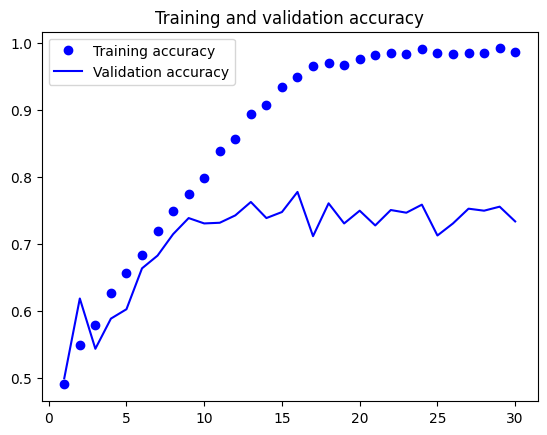

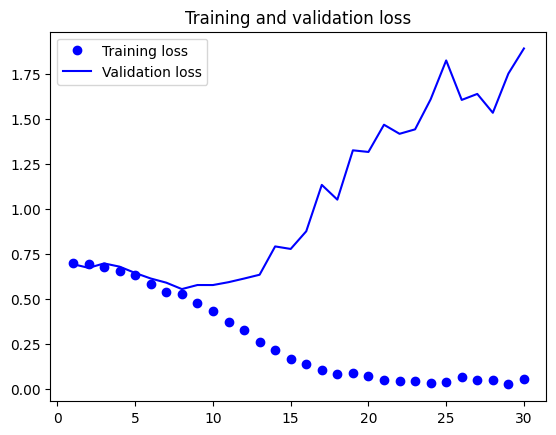

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

*S. 221* 

Listing 8.13 Evaluating the model on the test set

In [20]:
test_model = keras.models.load_model("model/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.6675 - loss: 0.5919
Test accuracy: 0.681


### **Test accuracy von 0.693**

Der **data_augmentation-Block** erstellt eine Pipeline für die Bildaugmentation, bei der:

Zufällige horizontale Spiegelungen durchgeführt werden.
Zufällige Rotationen von Bildern im Bereich von -10 bis +10 Grad angewendet werden.
Zufälliger Zoom von bis zu 20% durchgeführt wird.

Das hilft, das Modell robuster gegen verschiedene Bildorientierungen zu machen und verhindert, dass das Modell nur spezifische Ausrichtungen von Objekten erkennt.

*S.221*
Listing 8.14 Define a data augmentation stage to add to an image model

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

*S. 222*

Listing 8.15 Displaying some randomly augmented training images

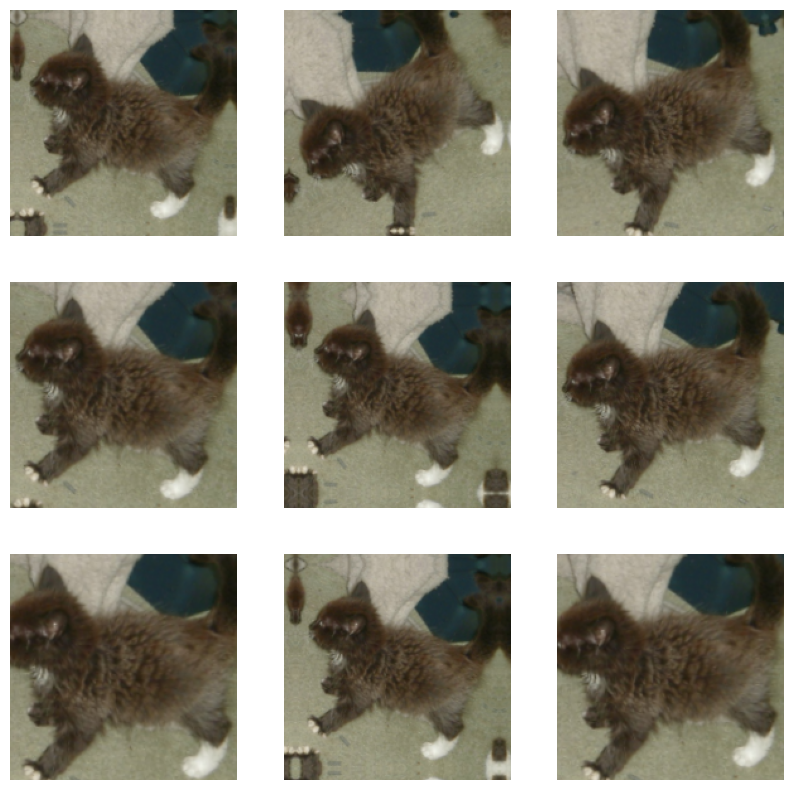

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): #welches bild
    for i in range(9): # bilder anzahl
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1) # wie viele plots
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

binäre Klassifikationsaufgabe eines CNN Models:
- **Input 180 x 180 x 3 Farbkanäle RGB**
- **data_augmentation(inputs)** Transormierten bilder mit den bilder inputs gespiegelt, Rotationen und Zoom.
- **Reskalierung: (x = layers.Rescaling(1./255)(x))**
Die Reskalierung sorgt dafür, dass die Pixelwerte der Bilder von einem Bereich von [0, 255] (die typischen Farbwerte von Bildern) auf [0, 1] skaliert werden.
Dies ist wichtig, weil es den Lernprozess stabiler macht und das Modell schneller konvergieren kann, da viele neuronale Netzwerke besser mit kleineren Eingabewerten arbeiten.

- **Konvolutionale Schichten (Conv2D)**
    - Jede Conv2D-Schicht hat eine bestimmte Anzahl von Filtern (oder Kernels) und eine Kernelgröße (hier 3x3). Diese Filter werden über das Bild geschoben, um lokale Merkmale wie Kanten, Ecken oder Texturen zu extrahieren.
    -Die Anzahl der Filter wächst mit den Schichten (32, 64, 128, 256), was darauf hindeutet, dass das Modell zunehmend komplexere Merkmale erlernt, je weiter es in der Tiefe geht.
    - activation="relu" bedeutet, dass die ReLU-Aktivierungsfunktion auf die Ausgaben jeder Convolutional-Schicht angewendet wird. ReLU hilft, Nichtlinearitäten in das Modell einzuführen, wodurch es leistungsfähiger wird.

- Max-Pooling-Schichten (MaxPooling2D): Nach jeder Convolutional-Schicht folgt eine Max-Pooling-Schicht, die die Dimensionen der Feature-Maps reduziert.
- Der Parameter pool_size=2 bedeutet, dass der Pooling-Bereich 2x2 ist. Max-Pooling extrahiert das Maximum aus einem 2x2 Bereich der Feature-Map, was zu einer Reduzierung der Größe und einer Verdichtung der Informationen führt.
- Dies hilft, die Rechenleistung zu reduzieren und das Modell robuster gegenüber kleinen Verschiebungen im Bild zu machen.

- **Flatten**
- Flatten() wird verwendet, um die mehrdimensionalen Ausgaben der letzten Konvolutional- und Pooling-Schicht in einen flachen Vektor umzuwandeln.
- Dies ist notwendig, da die nachfolgende dichte Schicht (Dense) nur mit Vektoren arbeitet (nicht mit mehrdimensionalen Tensoren).

Dropout-Sicht (Dropout=0.50)
- Regulierungstechnik um Overfitting zu verhindern.
- Während des Trainings zufällig 50 % der Neuronen in dieser Sicht deaktivert (auf Null gesetzt)
- Dies zwingt das Modell, robustere Merkmale zu lernen, da es nicht auf bestimmte Neuronen angewiesen ist.

- Ausgabeschicht (Dense)
- Dense(1, activation="sigmoid") definiert eine dichte Schicht mit nur einem Neuron und der Sigmoid-Aktivierungsfunktion.
- Da es sich um ein binäres Klassifikationsproblem handelt, gibt die 
    - Sigmoid-Funktion eine Wahrscheinlichkeit zwischen 0 und 1 zurück, die angibt, ob das Bild der Klasse 1 oder Klasse 0 zugeordnet werden soll.


---
*S.223*

Listing 8.16 Defining a new convnet that includes image augmentation and dropout

In [23]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model/convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 814ms/step - accuracy: 0.5102 - loss: 0.7016 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 884ms/step - accuracy: 0.5159 - loss: 0.6953 - val_accuracy: 0.5920 - val_loss: 0.6920
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 799ms/step - accuracy: 0.5392 - loss: 0.6930 - val_accuracy: 0.5070 - val_loss: 0.6915
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 846ms/step - accuracy: 0.5577 - loss: 0.6805 - val_accuracy: 0.5360 - val_loss: 0.6830
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 792ms/step - accuracy: 0.5857 - loss: 0.6738 - val_accuracy: 0.6290 - val_loss: 0.6538
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 760ms/step - accuracy: 0.6174 - loss: 0.6582 - val_accuracy: 0.5920 - val_loss: 0.6534
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 777ms/step - accuracy: 0.6167 - loss: 0.6507 - val_accuracy: 0.6850 - val_loss: 0.6024
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 835ms/step - accuracy: 0.6768 - loss: 0.6029 - 

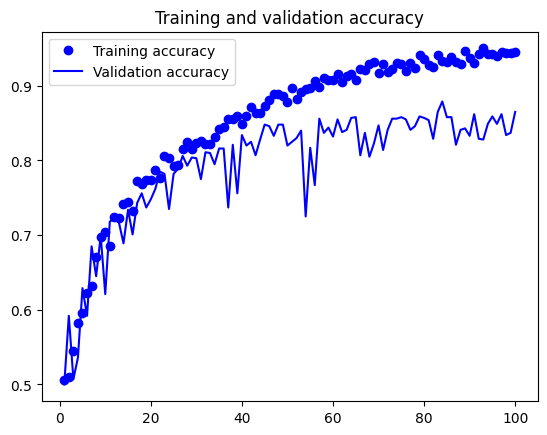

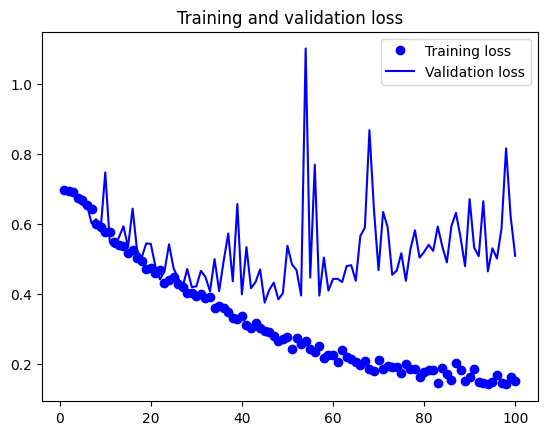

In [25]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [27]:
test_model = keras.models.load_model(
"model/convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8506 - loss: 0.4250
Test accuracy: 0.835


### **Test accuracy: 0.795**

### Model **convnet_from_scratch_with_augmentation**

In [28]:
import tensorflow as tf

# Modell laden
model_path = r"model\convnet_from_scratch_with_augmentation.keras"
model_convnet_from_scratch_with_augmentation = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
model_convnet_from_scratch_with_augmentation.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

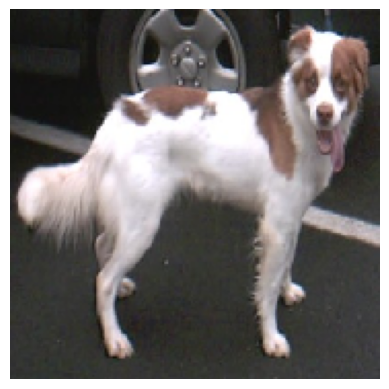

In [29]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = r"cats_and_dogs_small\test\dogs\1500.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen (optional)
plt.imshow(img)
plt.axis("off")
plt.show()


In [30]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [31]:
# Vorhersage mit dem geladenen Modell
prediction = model.predict(img_array)

# Vorhersage auswerten
# Da es eine binäre Klassifikation (Hund vs. Katze) ist:
if prediction[0] > 0.5:
    print("Das Bild zeigt einen Hund.")
else:
    print("Das Bild zeigt eine Katze.")

# Ausgabe der Vorhersagewahrscheinlichkeit
print("Vorhersagewahrscheinlichkeit für Hund:", prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Das Bild zeigt einen Hund.
Vorhersagewahrscheinlichkeit für Hund: [0.99997145]


### 2. Modell einladen **convnet_from_scratch**
---

In [32]:
import tensorflow as tf

# Modell laden
model_path = r"model\convnet_from_scratch.keras"
convnet_from_scratch = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
convnet_from_scratch.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

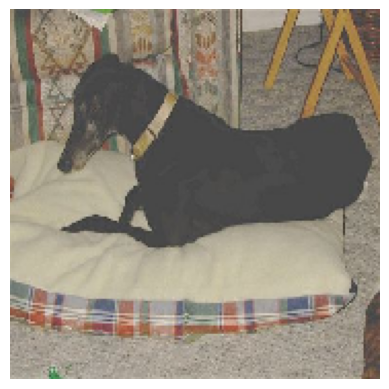

In [33]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = r"cats_and_dogs_small\test\dogs\1993.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [34]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [35]:
# Vorhersage mit dem geladenen Modell
prediction = convnet_from_scratch.predict(img_array)

# Vorhersage auswerten
# Da es eine binäre Klassifikation (Hund vs. Katze) ist:
if prediction[0] > 0.5:
    print("Das Bild zeigt einen Hund.")
else:
    print("Das Bild zeigt eine Katze.")

# Ausgabe der Vorhersagewahrscheinlichkeit
print("Vorhersagewahrscheinlichkeit für Hund:", prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Das Bild zeigt eine Katze.
Vorhersagewahrscheinlichkeit für Hund: [0.13045555]


## Bereits erstelltest Model nutzen:
---

Feature extraction consists of using the representations learned by a previously
trained model to extract interesting features from new samples. These features are
then run through a new classifier, which is trained from scratch.
As you saw previously, convnets used for image classification comprise two parts:
they start with a series of pooling and convolution layers, and they end with a densely
connected classifier. The first part is called the convolutional base of the model. In the
case of convnets, feature extraction consists of taking the convolutional base of a previously
trained network, running the new data through it, and training a new classifier
on top of the output.

In [36]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [37]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [39]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [40]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="model/feature_extraction.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
train_features, train_labels,
epochs=20,
validation_data=(val_features, val_labels),
callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8796 - loss: 33.3192 - val_accuracy: 0.9630 - val_loss: 4.9118
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9693 - loss: 4.0580 - val_accuracy: 0.9770 - val_loss: 2.9454
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9867 - loss: 0.8568 - val_accuracy: 0.9750 - val_loss: 3.4727
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9942 - loss: 0.6974 - val_accuracy: 0.9760 - val_loss: 4.7832
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9974 - loss: 0.1171 - val_accuracy: 0.9760 - val_loss: 3.7220
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9953 - loss: 0.7442 - val_accuracy: 0.9760 - val_loss: 4.9474
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9946 - loss: 0.5047 - val_accuracy: 0.9670 - val_loss: 7.1841
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9955 - loss: 0.5132 - val_accuracy: 0.9790 - 

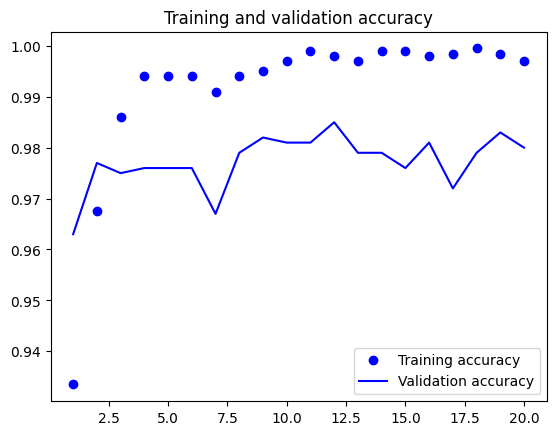

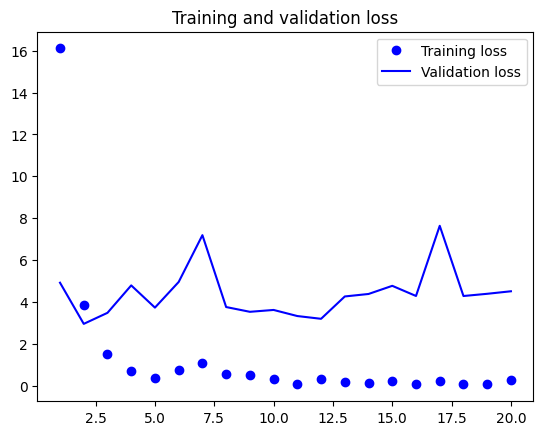

In [41]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [51]:
import tensorflow as tf

# Modell laden
model_path = r"model\feature_extraction.keras"
feature_extraction = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
feature_extraction.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,554,628 (25.00 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,277,315 (12.50 MB)

In [59]:
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [74]:
import numpy as np
import imageio.v2 as imageio  # Verwende imageio.v2, um das alte Verhalten beizubehalten
from PIL import Image

# Bild laden
img = imageio.imread(r'cats_and_dogs_small\test\cats\1510.jpg')

# Bild auf die gewünschte Größe (224, 224) skalieren
img_resized = Image.fromarray(img).resize((224, 224))

# Bild in das numpy Array einfügen
data = np.empty((1, 224, 224, 3))
data[0] = np.array(img_resized)


In [75]:
from keras.applications.mobilenet_v2 import preprocess_input

data = preprocess_input(data)

In [76]:
predictions = model.predict(data)
print('Shape: {}'.format(predictions.shape))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Shape: (1, 1000)


In [77]:
output_neuron = np.argmax(predictions[0])
print('Most active neuron: {} ({:.2f}%)'.format(
    output_neuron,
    100 * predictions[0][output_neuron]
))

Most active neuron: 283 (55.78%)


In [78]:
from keras.applications.mobilenet_v2 import decode_predictions

for name, desc, score in decode_predictions(predictions)[0]:
    print('- {} ({:.2f}%%)'.format(desc, 100 * score))

- Persian_cat (55.78%%)
- Angora (23.54%%)
- Siamese_cat (3.22%%)
- lynx (3.11%%)
- black-footed_ferret (2.25%%)


In [42]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False

In [48]:
conv_base.trainable = True
print("This is the number of trainable weights "
"before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [47]:
conv_base.trainable = False
print("This is the number of trainable weights "
"after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [85]:
import torch.hub
hub_model = torch.hub.load(
    'moskomule/senet.pytorch',
    'se_resnet50',
    pretrained=True,)

c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/moskomule/senet.pytorch/zipball/master" to C:\Users\riandrea/.cache\torch\hub\master.zip
Downloading: "https://github.com/moskomule/senet.pytorch/releases/download/archive/seresnet50-60a8950a85b2b.pkl" to C:\Users\riandrea/.cache\torch\hub\checkpoints\seresnet50-60a8950a85b2b.pkl
100.0%


In [86]:
print(hub_model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): SEBottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (se): SELayer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Se

In [89]:
from PIL import Image
import torchvision.transforms as transforms

# Lade ein Bild
img_path = r"cats_and_dogs_small\test\dogs\1501.jpg"
img = Image.open(img_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hub_model = hub_model.to(device)
# Vorverarbeitung des Bildes
preprocess = transforms.Compose([
    transforms.Resize(256),  # Skaliere das Bild auf 256x256
    transforms.CenterCrop(224),  # Mache einen 224x224 Ausschnitt in der Mitte
    transforms.ToTensor(),  # Konvertiere das Bild in ein Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalisierung (ImageNet Werte)
])

img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0).to(device)  # Füge Batch-Dimension hinzu und verschiebe auf das richtige Gerät (GPU/CPU)

# Vorhersage
with torch.no_grad():  # Deaktiviert die Berechnung des Gradienten, da wir keine Rückpropagation benötigen
    output = hub_model(img_tensor)

# Ausgabe anzeigen (z.B. die 5 wahrscheinlichsten Klassen)
_, predicted = torch.topk(output, 5)
print(predicted)


tensor([[600, 731, 463, 676, 852]])


In [94]:
# ImageNet-Klassenlabels
labels = {  # Dies ist eine sehr kleine Beispielsammlung; du solltest die komplette Liste verwenden.
    0: 'Dog',
    1: 'goldfish',
    2: 'great white shark',
    # Füge hier alle anderen 1000 ImageNet-Klassen hinzu
}

# Vorhersage-Labels (die top 5)
for idx in predicted[0]:
    print(labels.get(idx.item(), 'Unbekannt'))


Unbekannt
Unbekannt
Unbekannt
Unbekannt
Unbekannt
